## Loan Apporval Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [2]:
LoanAmount = pd.read_csv("loan.csv")

In [3]:
LoanAmount.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [4]:
LoanAmount.shape

(614, 6)

In [5]:
loanprep = LoanAmount.copy()

## Missing Values identify

In [7]:
loanprep.isnull().sum()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [8]:
loanprep = loanprep.dropna()

In [9]:
loanprep

,gender,married,ch,income,loanamt,status
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
5,Male,Yes,1.0,5417,267.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


In [10]:
loanprep.isnull().sum()

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

## Create Dummy Variables

In [12]:
#Drop Gender

In [13]:
loanprep = loanprep.drop(['gender'], axis =1)

In [14]:
loanprep.dtypes

married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object

In [15]:
loanprep = pd.get_dummies(loanprep, drop_first = True)

In [16]:
loanprep 

,ch,income,loanamt,married_Yes,status_Y
1,1.0,4583,128.0,1,0
2,1.0,3000,66.0,1,1
3,1.0,2583,120.0,1,1
4,1.0,6000,141.0,0,1
5,1.0,5417,267.0,1,1
...,...,...,...,...,...
609,1.0,2900,71.0,0,1
610,1.0,4106,40.0,1,1
611,1.0,8072,253.0,1,1
612,1.0,7583,187.0,1,1


In [17]:
#Normalise the data for loan Amount and income using StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scalar_ = StandardScaler()

In [20]:
loanprep['income']  = scalar_.fit_transform(loanprep[['income']])
loanprep['loanamt']  = scalar_.fit_transform(loanprep[['loanamt']])

In [21]:
loanprep

,ch,income,loanamt,married_Yes,status_Y
1,1.0,-0.128073,-0.194250,1,0
2,1.0,-0.392077,-0.971015,1,1
3,1.0,-0.461621,-0.294478,1,1
4,1.0,0.108246,-0.031380,0,1
5,1.0,0.011017,1.547205,1,1
...,...,...,...,...,...
609,1.0,-0.408754,-0.908372,0,1
610,1.0,-0.207624,-1.296754,1,1
611,1.0,0.453802,1.371807,1,1
612,1.0,0.372249,0.544929,1,1


## Build the Logistic Regerssion Model

In [22]:
#Create X and Y 


In [23]:
Y = loanprep[['status_Y']]

In [24]:
X = loanprep.drop(['status_Y'],axis  =1)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y,test_size = 0.2, random_state =1234, stratify =Y)

In [27]:
X_train.shape

(423, 4)

In [28]:
X_test.shape

(106, 4)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(X_train, Y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
Y_predict = lr.predict(X_test)

In [34]:
Y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=uint8)

In [35]:
Y_predict.shape

(106,)

## Build the Confusion Matrix and Get the Accuracy

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm  = confusion_matrix(Y_test, Y_predict)

In [38]:
cm

array([[19, 14],
       [ 2, 71]], dtype=int64)

In [39]:
score = lr.score(X_test, Y_test)

In [40]:
score

0.8490566037735849

## Support Vector Machine

In [41]:
from sklearn.svm import SVC


In [42]:
svc = SVC()

In [43]:
svc.fit(X_train, Y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
Y_predict = svc.predict(X_test)

In [45]:
Y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=uint8)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
cm  = confusion_matrix(Y_test, Y_predict)
cr = classification_report(Y_test, Y_predict)

In [47]:
score = svc.score(X_test, Y_test)

In [62]:
score

0.8490566037735849

In [63]:
cm

array([[18, 15],
       [ 1, 72]], dtype=int64)

In [49]:
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.55      0.69        33
           1       0.83      0.99      0.90        73

    accuracy                           0.85       106
   macro avg       0.89      0.77      0.80       106
weighted avg       0.86      0.85      0.84       106



In [50]:
score2 = accuracy_score(Y_test, Y_predict)

In [51]:
score2

0.8490566037735849

In [52]:
# get the probabilities of the predictions

In [53]:
Y_prob = lr.predict_proba(X_test)[:,1]

In [54]:
print(Y_prob)


[0.7093181  0.79476937 0.83928099 0.81754452 0.84905981 0.79658114
 0.79372735 0.74044798 0.1471851  0.75148505 0.72778615 0.81779425
 0.79742474 0.71443198 0.15246776 0.81609696 0.77696703 0.79757168
 0.82734972 0.84134509 0.82360191 0.83048852 0.73713156 0.14973752
 0.81072717 0.82039075 0.80004781 0.75048542 0.15560815 0.17374775
 0.16166494 0.81427258 0.8447814  0.82759241 0.78492472 0.81371598
 0.75758751 0.82645084 0.81725928 0.12168654 0.81392455 0.78756209
 0.73857951 0.76591739 0.76674142 0.84843651 0.09642511 0.15688186
 0.80563483 0.77123725 0.71802332 0.70733402 0.8212695  0.65465622
 0.75787802 0.8486128  0.76629983 0.80019101 0.81632017 0.75618565
 0.12912652 0.75149126 0.68365192 0.85481709 0.78163721 0.81124224
 0.82720891 0.10426965 0.73690523 0.72852876 0.8380881  0.8446418
 0.15500473 0.10335125 0.78954867 0.06540712 0.79820274 0.74677234
 0.78415979 0.11374428 0.797167   0.76867033 0.70727902 0.7806554
 0.81696359 0.76264081 0.7423323  0.82576399 0.14454236 0.066421

## Created predictions based on probability

In [56]:
Y_new_pred = []
thershold = 0.8

In [57]:
for i in range (0, len(Y_prob)):
    if Y_prob[i] > thershold:
        Y_new_pred.append(1)
    else:
        Y_new_pred.append(0)

In [58]:
cm2  = confusion_matrix(Y_test, Y_new_pred)
cr2 = classification_report(Y_test, Y_new_pred)
score3 = accuracy_score(Y_test, Y_new_pred)

In [59]:
cm2

array([[31,  2],
       [38, 35]], dtype=int64)

In [64]:
print(cr2)

              precision    recall  f1-score   support

           0       0.45      0.94      0.61        33
           1       0.95      0.48      0.64        73

    accuracy                           0.62       106
   macro avg       0.70      0.71      0.62       106
weighted avg       0.79      0.62      0.63       106



In [61]:
score3

0.6226415094339622

In [65]:
#AUC ROC  --> Area under Curve Receiver Operating Charctersitics 

In [66]:
#Plot the curve

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

In [68]:
fpr, tpr, thershold = roc_curve(Y_test, Y_prob)

In [69]:
AUC = roc_auc_score(Y_test,Y_prob)

In [72]:
AUC

0.858862598588626

In [70]:
import matplotlib.pyplot as plt

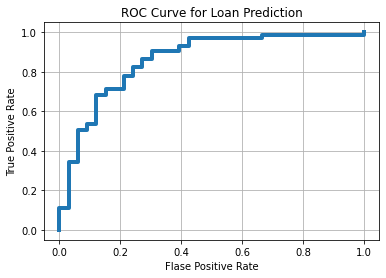

In [71]:
plt.plot(fpr, tpr, linewidth =4)
plt.title("ROC Curve for Loan Prediction")
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()